In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torchxrayvision as xrv

from matplotlib import pyplot as plt

import pandas as pd

In [2]:
# Declare path to chexpert
path_to_chexpert = "/zfs/wficai/chexpert/chexpertchestxrays-u20210408/"


In [3]:
path = "/zfs/wficai/chexpert/chexpertchestxrays-u20210408/train_cheXbert.csv"
# path = "/zfs/wficai/chexpert/chexpertchestxrays-u20210408/valid.csv"
# path = "/zfs/wficai/chexpert/chexpertchestxrays-u20210408/train.csv"

df = pd.read_csv(path)
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,No Finding
0,CheXpert-v1.0/train/patient00001/study1/view1_...,Female,68,Frontal,AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0
1,CheXpert-v1.0/train/patient00002/study2/view1_...,Female,87,Frontal,AP,NaN,1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN
2,CheXpert-v1.0/train/patient00002/study1/view1_...,Female,83,Frontal,AP,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,CheXpert-v1.0/train/patient00002/study1/view2_...,Female,83,Lateral,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,CheXpert-v1.0/train/patient00003/study1/view1_...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Define transforms


# Call the data loader
d_chex = xrv.datasets.CheX_Dataset(imgpath=path_to_chexpert,
                                 #   csvpath=f"{path_to_chexpert}/train_cheXbert.csv",
                                   csvpath=f"{path_to_chexpert}/train.csv",
                                   transform=None,
                                   unique_patients=False)

In [5]:
# Check one sample
d_chex[2]

{'idx': 2,
 'lab': array([ 1.,  1., nan,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=float32),
 'img': array([[[-1024.     , -1015.9686 , -1024.     , ..., -1024.     ,
          -1024.     , -1024.     ],
         [ -461.8039 ,  -453.77252,  -317.2392 , ...,  -766.9961 ,
           -758.9647 ,  -758.9647 ],
         [ -550.14905,  -501.96075,  -493.92938, ...,  -775.02747,
           -766.9961 ,  -766.9961 ],
         ...,
         [ -871.40393,  -871.40393,  -879.4353 , ...,  -887.4667 ,
           -887.4667 ,  -887.4667 ],
         [ -871.40393,  -871.40393,  -879.4353 , ...,  -879.4353 ,
           -879.4353 ,  -879.4353 ],
         [ -871.40393,  -871.40393,  -879.4353 , ...,  -871.40393,
           -871.40393,  -871.40393]]], dtype=float32),
 'patientid': '00009',
 'view': 'PA'}

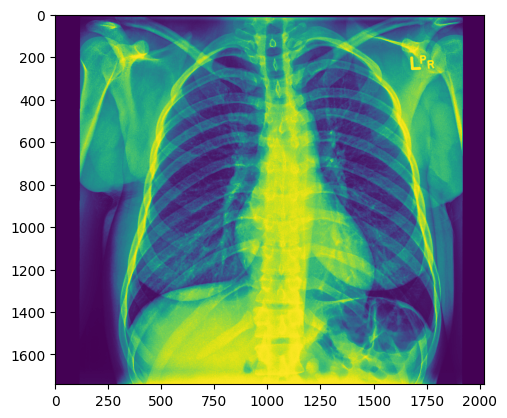

In [42]:
# Plot image
plt.imshow(d_chex[0]['img'][0])

In [36]:
# See if torchvsion dataloader will accept it
dataloader = torch.utils.data.DataLoader(d_chex)

In [37]:
for x in dataloader:
    print(x)

       [-1024.0000,  -204.8000,  -301.1765,  ...,  -469.8353,
            -445.7411,  -381.4902]]]])}
{'idx': tensor([197]), 'lab': tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0., nan, nan]]), 'img': tensor([[[[ -927.6235,  -927.6235,  -927.6235,  ...,   702.7451,
             702.7451,   702.7451],
          [ -927.6235,  -927.6235,  -927.6235,  ...,   694.7137,
             694.7137,   702.7451],
          [ -927.6235,  -927.6235,  -927.6235,  ...,   718.8079,
             710.7765,   710.7765],
          ...,
          [-1015.9686, -1015.9686, -1015.9686,  ...,  -983.8431,
            -983.8431,  -983.8431],
          [-1015.9686, -1015.9686, -1015.9686,  ...,  -991.8745,
            -991.8745,  -975.8118],
          [-1015.9686, -1015.9686, -1015.9686,  ...,  -991.8745,
            -983.8431,  -975.8118]]]])}
{'idx': tensor([198]), 'lab': tensor([[nan, nan, 0., nan, nan, nan, nan, 1., 0., nan, 0., 0., nan]]), 'img': tensor([[[[-1024.0000, -1024.0000, -1015.9686,  ...

In [ ]:
dataloader[0]

In [ ]:
next(iter(dataloader))

In [ ]:
# Try just the train.csv file
d_chex = xrv.datasets.CheX_Dataset(
            imgpath=path_to_chexpert,
            csvpath=f"{path_to_chexpert}/CheXpert-v1.0/train.csv",
            transform=None,
        )

In [7]:
d_chex[0]

{'idx': 0,
 'lab': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan],
       dtype=float32),
 'img': array([[[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         ...,
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.]]],
       dtype=float32)}

# Try personal class

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0,"..")

In [7]:
import custom_datasets

from matplotlib import pyplot as plt


# import torchxrayvision as xrv
# import torch
# from torch import nn
# from torchvision import transforms

# tfsms = transforms.Compose(
#                 [xrv.datasets.XRayCenterCrop(), xrv.datasets.XRayResizer(224)]
#             )

In [8]:
alpha = custom_datasets.Chexpert(transforms_pytorch="RGB", batch_size=1)

In [9]:
ds = alpha.get_dataset(split="train")
ds

{'Atelectasis': {0.0: 5007, 1.0: 2460},
 'Cardiomegaly': {0.0: 6500, 1.0: 2117},
 'Consolidation': {0.0: 8826, 1.0: 1125},
 'Edema': {0.0: 7576, 1.0: 1330},
 'Effusion': {0.0: 9272, 1.0: 5206},
 'Enlarged Cardiomediastinum': {0.0: 7694, 1.0: 1100},
 'Fracture': {0.0: 5092, 1.0: 1115},
 'Lung Lesion': {0.0: 5158, 1.0: 1655},
 'Lung Opacity': {0.0: 5544, 1.0: 7006},
 'Pleural Other': {0.0: 4935, 1.0: 782},
 'Pneumonia': {0.0: 5247, 1.0: 992},
 'Pneumothorax': {0.0: 9208, 1.0: 1060},
 'Support Devices': {0.0: 591, 1.0: 5755}}


CheX_Dataset num_samples=20543 views=['PA'] data_aug=None

In [14]:
ds[0]

{'idx': 0,
 'lab': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan],
       dtype=float32),
 'img': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]])}

In [37]:
ds[0]['img'][:,200,200]

tensor([1., 1., 1.])

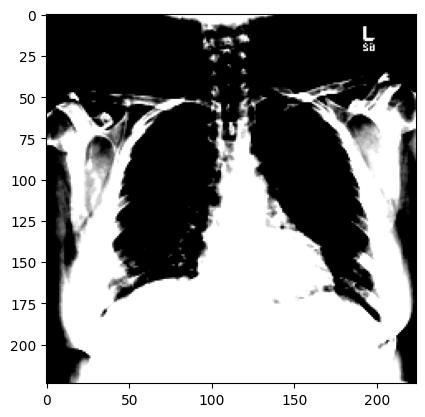

In [10]:
plt.imshow(ds[10]['img'].permute(1,2,0))

In [11]:
dl = alpha.get_dataloader(split="train")

Fetching dataloader for train split


labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


{'idx': 1,
 'lab': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 'img': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]])}

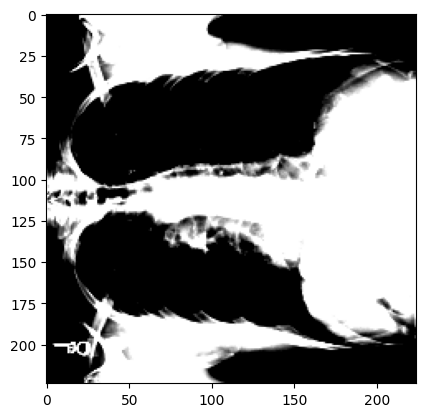

In [7]:
alpha.check_dataset(split="train")

labels: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]


{'idx': 1,
 'lab': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.], dtype=float32),
 'img': tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [1.0000, 0.4392, 0.8078,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 0.6627, 0.7882,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 0.8745, 0.8471,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [1.0000, 0.4392, 0.8078,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 0.6627, 0.7882,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 0.8745, 0.8471,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
    

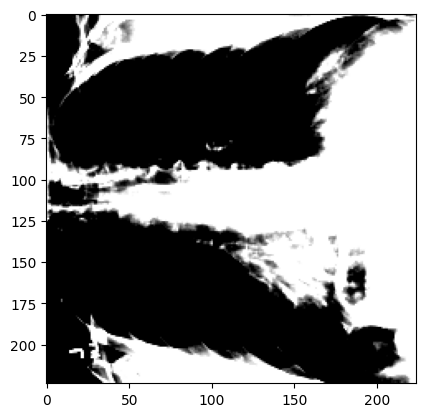

In [8]:
alpha.check_dataset(split="valid")

In [11]:
alpha.check_dataloader()

Fetching dataloader for train split
{'idx': tensor([0]), 'lab': tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., nan]]), 'img': tensor([[[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          ...,
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
          [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]]]])}


In [7]:
alpha.check_dataloader(split="valid")

Fetching dataloader for valid split
{'idx': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'lab': tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
 

# Modify train and csv to throw out negative labels